In [107]:
def tri_liste(liste1,liste2) :
    indices_trie = sorted(range(len(liste1)), key=lambda i: liste1[i])

    liste1_triee = [liste1[i] for i in indices_trie]
    liste2_triee = [liste2[i] for i in indices_trie]
    return liste1_triee,liste2_triee

In [108]:
with open("stats2",'r') as fichier :
    lignes = fichier.readlines()

In [109]:
liste1 = [int(element.split()[0]) for element in lignes[:1000]]
liste2 = [int(element.split()[1]) for element in lignes[:1000]]
liste_n_bruit_0,liste_succes_bruit_0 = tri_liste(liste1,liste2)

liste1 = [int(element.split()[0]) for element in lignes[1000:2000]]
liste2 = [int(element.split()[1]) for element in lignes[1000:2000]]
liste_n_bruit_1,liste_succes_bruit_1 = tri_liste(liste1,liste2)


liste1 = [int(element.split()[0]) for element in lignes[2000:3000]]
liste2 = [int(element.split()[1]) for element in lignes[2000:3000]]
liste_n_bruit_2,liste_succes_bruit_2 = tri_liste(liste1,liste2)

liste1 = [int(element.split()[0]) for element in lignes[3000:]]
liste2= [int(element.split()[1]) for element in lignes[3000:]]
liste_n_bruit_3,liste_succes_bruit_3 = tri_liste(liste1,liste2)


In [110]:
import numpy as np

In [111]:
def trouver_quartile(data) :
    Q1 = np.percentile(data, 25)  
    Q2 = np.percentile(data, 50) 
    Q3 = np.percentile(data, 75) 
    return int(Q1),int(Q2),int(Q3)

def pourcentage_succes(donnes,donnes_succes,quartile) :
    succes = 0
    nb_element = 0
    for i in range(1000) :
        if donnes[i] < quartile :
            succes+=donnes_succes[i]
            nb_element+=1
    return succes/nb_element

In [112]:
Q1,Q2,Q3 = trouver_quartile(liste_n_bruit_0)
succes_q1_bruit_0 = pourcentage_succes(liste_n_bruit_0,liste_succes_bruit_0,Q1)
succes_q2_bruit_0 = pourcentage_succes(liste_n_bruit_0,liste_succes_bruit_0,Q2)
succes_q3_bruit_0 = pourcentage_succes(liste_n_bruit_0,liste_succes_bruit_0,Q3)
succes_global_bruit_0 = pourcentage_succes(liste_n_bruit_0,liste_succes_bruit_0,999999)
print(Q1,Q2,Q3)
print(succes_q1_bruit_0,succes_q2_bruit_0,succes_q3_bruit_0,succes_global_bruit_0)

50 115 233
0.2971887550200803 0.6492985971943888 0.7657295850066934 0.825


In [113]:
Q1,Q2,Q3 = trouver_quartile(liste_n_bruit_0)
succes_q1_bruit_1 = pourcentage_succes(liste_n_bruit_1,liste_succes_bruit_1,Q1)
succes_q2_bruit_1 = pourcentage_succes(liste_n_bruit_1,liste_succes_bruit_1,Q2)
succes_q3_bruit_1 = pourcentage_succes(liste_n_bruit_1,liste_succes_bruit_1,Q3)
succes_global_bruit_1 = pourcentage_succes(liste_n_bruit_1,liste_succes_bruit_1,999999)
print(Q1,Q2,Q3)
print(succes_q1_bruit_1,succes_q2_bruit_1,succes_q3_bruit_1,succes_global_bruit_1)

50 115 233
0.024793388429752067 0.4314516129032258 0.612859097127223 0.717


In [114]:
Q1,Q2,Q3 = trouver_quartile(liste_n_bruit_2)
succes_q1_bruit_2 = pourcentage_succes(liste_n_bruit_2,liste_succes_bruit_2,Q1)
succes_q2_bruit_2 = pourcentage_succes(liste_n_bruit_2,liste_succes_bruit_2,Q2)
succes_q3_bruit_2 = pourcentage_succes(liste_n_bruit_2,liste_succes_bruit_2,Q3)
succes_global_bruit_2= pourcentage_succes(liste_n_bruit_2,liste_succes_bruit_2,999999)
print(Q1,Q2,Q3)
print(succes_q1_bruit_2,succes_q2_bruit_2,succes_q3_bruit_2,succes_global_bruit_2)

47 128 249
0.004016064257028112 0.11244979919678715 0.3906040268456376 0.546


In [115]:
Q1,Q2,Q3 = trouver_quartile(liste_n_bruit_3)
succes_q1_bruit_3 = pourcentage_succes(liste_n_bruit_3,liste_succes_bruit_3,Q1)
succes_q2_bruit_3 = pourcentage_succes(liste_n_bruit_3,liste_succes_bruit_3,Q2)
succes_q3_bruit_3 = pourcentage_succes(liste_n_bruit_3,liste_succes_bruit_3,Q3)
succes_global_bruit_3 = pourcentage_succes(liste_n_bruit_3,liste_succes_bruit_3,999999)
print(Q1,Q2,Q3)
print(succes_q1_bruit_3,succes_q2_bruit_3,succes_q3_bruit_3,succes_global_bruit_3)

49 125 249
106.93442622950819 102.95336076817559 101.149 101.149


In [116]:
import pandas as pd

In [117]:
tableau = pd.DataFrame({
    'Q1': [succes_q1_bruit_0,succes_q1_bruit_1,succes_q1_bruit_1,succes_q1_bruit_2],
    'Q2': [succes_q2_bruit_0,succes_q2_bruit_1,succes_q2_bruit_2,succes_q2_bruit_3],
    'Q3': [succes_q3_bruit_0,succes_q3_bruit_1,succes_q3_bruit_2,succes_q3_bruit_3]
},[i for i in range(4)]).round(2)
tableau.index.name = "σ"
tableau

,Q1,Q2,Q3
σ,,,
0,0.30,0.65,0.77
1,0.02,0.43,0.61
2,0.02,0.11,0.39
3,0.00,102.95,101.15


In [118]:
import matplotlib.pyplot as plt

In [119]:
with open("stats",'r') as fichier :
    lignes2 = fichier.readlines()

In [123]:
x = [float(element.split()[0]) for element in lignes2]
y = [float(element.split()[1]) for element in lignes2]

[82.0]

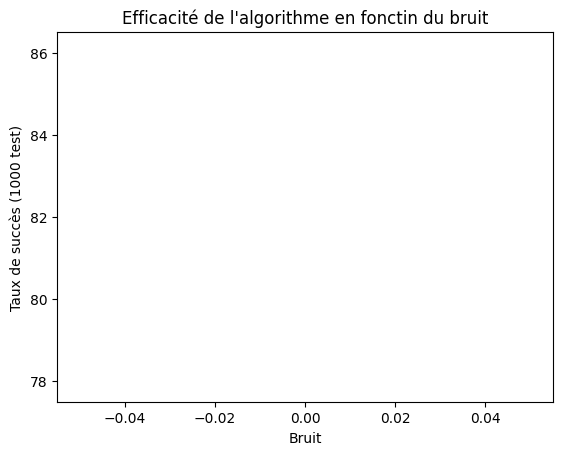

In [129]:
plt.title("Efficacité de l'algorithme en fonctin du bruit")
plt.xlabel("Bruit")
plt.ylabel("Taux de succès (1000 test)")
plt.plot(x,y)